<a href="https://colab.research.google.com/github/jessica-guan/TRAIN-Notebooks/blob/main/Copy_of_TRAIN_YLC_Week_7_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 7: Linear Regression Part II**
---

### **Description**

In this week's homework, we will continue honing your ability to build and evaluate linear regression models.

<br>

### **Structure**

**Part 1**: [Bike Rental Dataset](#p1)

**Part 2**: [Anscombe's Quartet](#p2)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Understand how to implement Linear Regression models with sklearn and access/interpret their parameters.

* Recognize how to evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=sharing)


<br>

**Run the code below before continuing.**

<a name="p1"></a>

---
## **Part 1: Bike Rental Dataset**
---

#### **About the Dataset**
The Bike Sharing dataset contains information about hourly bike rental data spanning two years, provided by a bike-sharing system in Washington, D.C. The dataset includes factors such as weather, date, time, and user information.

The features are as follows:
* `instant`: A unique identifier for each record in the dataset.
* `dteday`: The date of the bike rental in the format yyyy-mm-dd.
* `season`: The season of the year (1: spring, 2: summer, 3: fall, 4: winter).
* `yr`: The year (0: 2011, 1: 2012).
* `mnth`: The month of the year (1 to 12).
* `hr`: The hour of the day (0 to 23).
* `holiday`: A binary indicator of whether it is a holiday or not (0: not a holiday, 1: holiday).
* `weekday`: The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).
* `workingday`: A binary indicator of whether it is a working day or not (0: weekend or holiday, 1: working day).
* `weathersit`: The weather situation (1: clear, 2: misty/foggy, 3: light rain/snow, 4: heavy rain/snow).
* `temp`: The temperature in Celsius.
* `atemp`: The "feels like" temperature in Celsius.
* `hum`: The humidity level.
* `windspeed`: The wind speed.
* `casual`: The count of casual bike rentals.
* `registered`: The count of registered bike rentals.
* `cnt`: The total count of bike rentals (casual + registered).

#### **Your Task**
Using the  dataset, you will do the following:
* Build a model that can predict the total number of bike rentals.
* Use a different subset of features to build another model to predict the total number of bike rentals and compare the results.
* **NOTE**: For the sake of warming up, you *do not* have to consider the residuals at all in this part. Instead, you will just go straight to using the evaluation metrics.


<br>

**Run the code below before continuing.**

In [ ]:
# Import required libraries
import urllib.request
import zipfile
import pandas as pd

# Download the zip file and extract the CSV file(s)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
filename = "Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, filename)
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall()

# Read the CSV file(s) into Pandas dataframes
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

# Combine the two dataframes into a single dataframe
bikes_df = pd.concat([hour_df, day_df], ignore_index=True)

# Save the combined dataframe to a CSV file
bikes_df.to_csv("bike_sharing_total.csv", index=False)

bikes_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Problem #1.1**

Create a linear regression model using all of the features except `instant`, `dteday`, `casual`, `registered`, `cnt`, and `hr` columns, and then evaluate it using mean squared error and R2 as the metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

bike_data = pd.read_csv('bike_sharing_total.csv')

features = bike_data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'hr'])

X_train, X_test, y_train, y_test = train_test_split(features, bike_data['cnt'], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

919576.4303608645
0.023196623673425232


#### **Problem #1.2**

Create a linear regression model using all of the features except the `instant`, `dteday`, `casual`, `cnt`, and `hr` columns (this means we're including `registered`), and then evaluate it using mean squared error and R2 as the metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = bike_data.drop(columns=['instant', 'dteday', 'casual', 'cnt', 'hr'])

X_train, X_test, y_train, y_test = train_test_split(features, bike_data['cnt'], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

19319.804203060503
0.9794778885664651


### **Reflection question**

What differences did you notice in the performance of the two models? What does this mean?

<a name="p2"></a>

---
## **Part 2: Anscombe's Quartet**
---


In this section, you will explore the famous Anscombe's Quartet. These four artificial datasets are very simple and small, yet offer some powerful insights into the limitations of individual statistics (like $R^2$) and the value of visualizing data.


Each dataset consists of 11 points with an x value (our input or feature) and a y value (our output or target). This is the only information you need to get started. *After you have completed this section*, we encourage you to look up this dataset on Wikipedia and other sources to learn more about it.

<br>

**NOTE**: Because there is such a small number of points, we really cannot afford to split the data even more into training and test sets. To keep our code consistent, we will still use separate variables such as X_train and X_test, but they will actually be the exact same thing. In other words, we will train and test our model on the entire dataset. This is typical practice with such small datasets.

<br>


**To get started, run the provided cell to create a linear regression model trained on each of the four datasets.**

In [ ]:
# LOAD IN DATA
#==============
set1 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRVMS3mke4Skr1LcBoidilU1mcmeS5fpj0pbUfQoB-rG5GefKyOcTbcKoRt8N5QHXZYbaGcCJxZYZSw/pub?gid=646924765&single=true&output=csv")
set2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRVMS3mke4Skr1LcBoidilU1mcmeS5fpj0pbUfQoB-rG5GefKyOcTbcKoRt8N5QHXZYbaGcCJxZYZSw/pub?gid=1109791384&single=true&output=csv")
set3 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRVMS3mke4Skr1LcBoidilU1mcmeS5fpj0pbUfQoB-rG5GefKyOcTbcKoRt8N5QHXZYbaGcCJxZYZSw/pub?gid=2285367&single=true&output=csv")
set4 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRVMS3mke4Skr1LcBoidilU1mcmeS5fpj0pbUfQoB-rG5GefKyOcTbcKoRt8N5QHXZYbaGcCJxZYZSw/pub?gid=1733916884&single=true&output=csv")

inputs1 = set1[["x"]]
output1 = set1["y"]

inputs2 = set2[["x"]]
output2 = set2["y"]

inputs3 = set3[["x"]]
output3 = set3["y"]

inputs4 = set4[["x"]]
output4 = set4["y"]


# There's very little data, so we really can't afford to split it
X1_train = X1_test = inputs1
y1_train = y1_test = output1

X2_train = X2_test = inputs2
y2_train = y2_test = output2

X3_train = X3_test = inputs3
y3_train = y3_test = output3

X4_train = X4_test = inputs4
y4_train = y4_test = output4



# TRAIN MODELS
#==============
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
predictions1 = model1.predict(X1_test)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
predictions2 = model2.predict(X2_test)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
predictions3 = model3.predict(X3_test)

model4 = LinearRegression()
model4.fit(X4_train, y4_train)
predictions4 = model4.predict(X4_test)

#### **Problem #2.1**

Plot the residuals of for each model.

Two important reminders:

* The residuals are the difference between the actual values in the data (ex: y_test) and the predicted values.
* For a linear model to be trusted, the plot of residuals should look randomly distributed around 0. If there is any noticeable shape or pattern to this plot, we cannot trust a linear model or the metrics such as $R^2$ for it.

##### **Model 1**

The code for this has been provided to get you started.

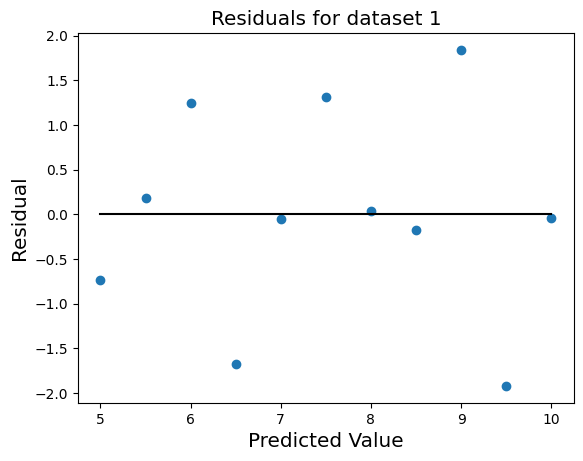

In [ ]:
import matplotlib.pyplot as plt

residuals1 = y1_test - predictions1

plt.scatter(predictions1, residuals1)
plt.plot([predictions1.min(), predictions1.max()], [0, 0], color = "black")

plt.title("Residuals for dataset 1", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residual", fontsize = "x-large")

plt.show()

##### **Model 2**

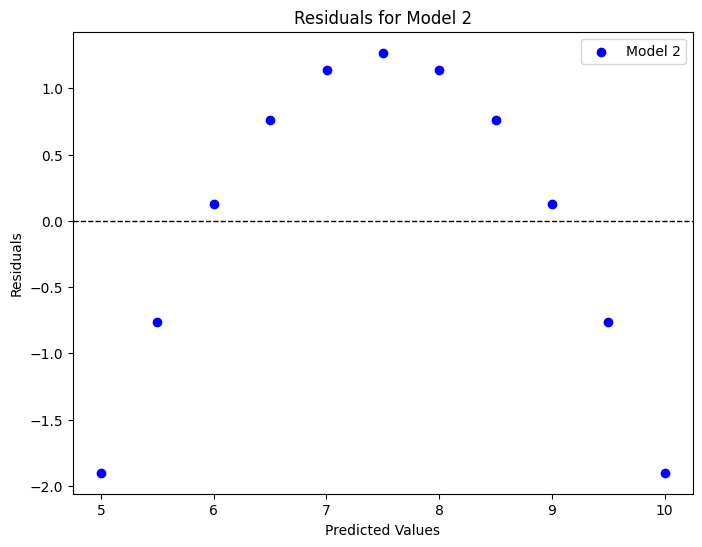

In [ ]:
residuals_2 = y2_test - predictions2
plt.figure(figsize=(8, 6))
plt.scatter(predictions2, residuals_2, c='b', label='Model 2')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals for Model 2')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

##### **Model 3**

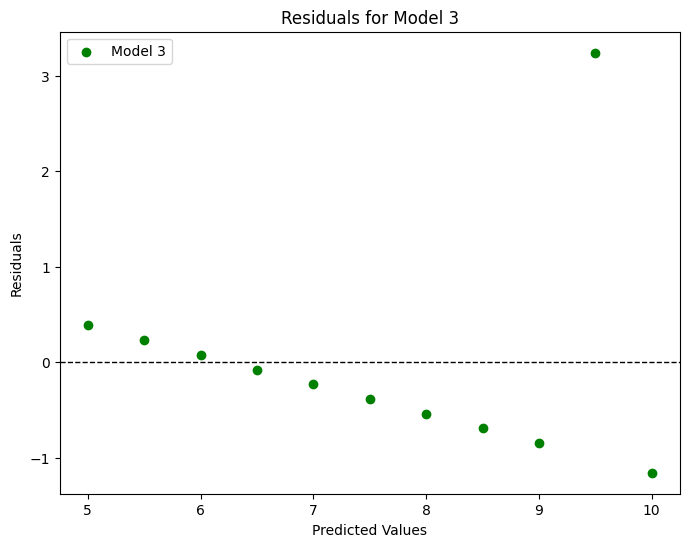

In [ ]:
residuals_3 = y3_test - predictions3
plt.figure(figsize=(8, 6))
plt.scatter(predictions3, residuals_3, c='g', label='Model 3')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals for Model 3')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

##### **Model 4**

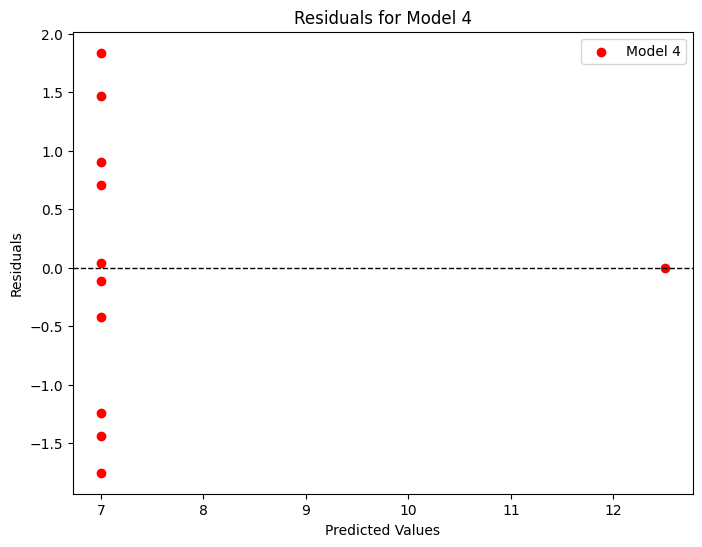

In [ ]:
residuals_4 = y4_test - predictions4
plt.figure(figsize=(8, 6))
plt.scatter(predictions4, residuals_4, c='r', label='Model 4')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals for Model 4')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### **Problem #2.2**

Evalute the $R^2$, MSE, and MAE for each model AND print the coefficient/intercept for each model. To get you started, the code for printing model 1's $R^2$ and coefficient/intercept has already been provided.

##### **Model 1**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: " + str(mean_squared_error(y1_test, predictions1)))
print("MAE: " + str(mean_absolute_error(y1_test, predictions1)))
print("y = " + str(model1.coef_[0]) + "*x + " + str(model1.intercept_))

MSE: 1.2511536363636366
MAE: 0.837404958677686
y = 0.5000909090909093*x + 3.0000909090909094


##### **Model 2**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: " + str(mean_squared_error(y2_test, predictions2)))
print("MAE: " + str(mean_absolute_error(y2_test, predictions1)))
print("y = " + str(model2.coef_[0]) + "*x + " + str(model2.intercept_))

MSE: 1.2523900826446281
MAE: 0.9679338842975203
y = 0.5*x + 3.00090909090909


##### **Model 3**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: " + str(mean_squared_error(y3_test, predictions3)))
print("MAE: " + str(mean_absolute_error(y3_test, predictions3)))
print("y = " + str(model3.coef_[0]) + "*x + " + str(model3.intercept_))

MSE: 1.2505628925619836
MAE: 0.7159669421487606
y = 0.4997272727272728*x + 3.002454545454545


##### **Model 4**

In [ ]:
# COMPLETE THIS CODEfrom sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: " + str(mean_squared_error(y4_test, predictions4)))
print("MAE: " + str(mean_absolute_error(y4_test, predictions4)))
print("y = " + str(model4.coef_[0]) + "*x + " + str(model4.intercept_))

MSE: 1.249317272727273
MAE: 0.902727272727273
y = 0.49990909090909097*x + 3.0017272727272726


#### **Problem #2.3**


Plot the data and the model (line) for each dataset.

##### **Model 1**

The code to plot the model has been provided. Now, fill in the rest to plot the data too.

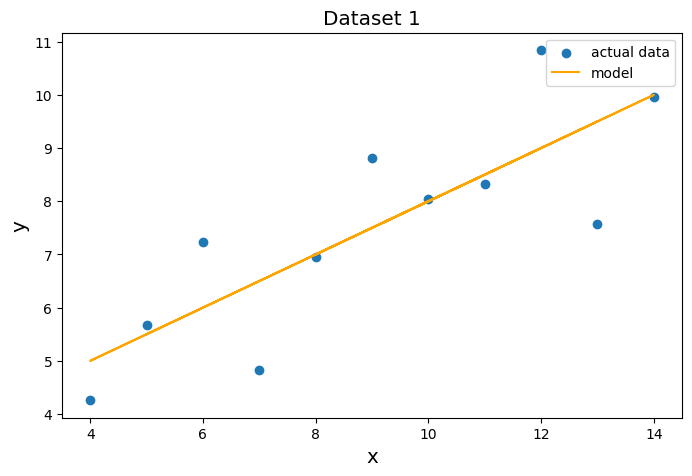

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(X1_test, y1_test, label = "actual data")
plt.plot(X1_test, predictions1, color = "orange", label = "model")

plt.title("Dataset 1", fontsize = "x-large")
plt.xlabel("x", fontsize = "x-large")
plt.ylabel("y", fontsize = "x-large")
plt.legend()

plt.show()

##### **Model 2**

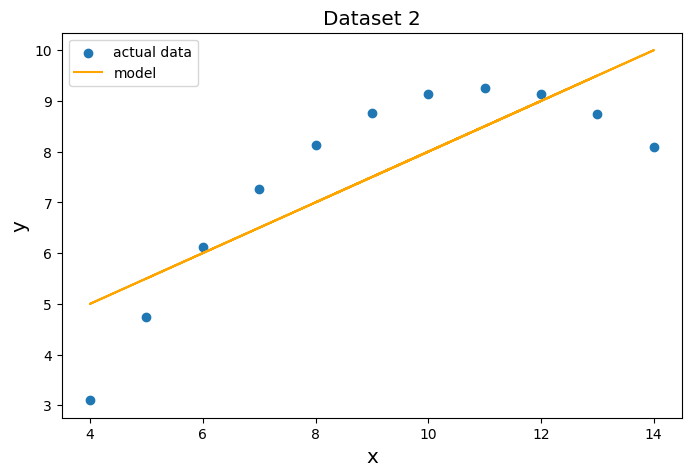

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(X2_test, y2_test, label = "actual data")
plt.plot(X2_test, predictions2, color = "orange", label = "model")

plt.title("Dataset 2", fontsize = "x-large")
plt.xlabel("x", fontsize = "x-large")
plt.ylabel("y", fontsize = "x-large")
plt.legend()

plt.show()

##### **Model 3**

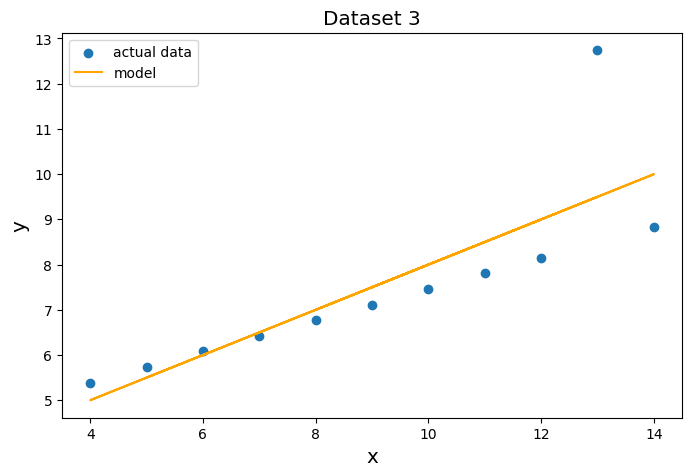

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(X3_test, y3_test, label = "actual data")
plt.plot(X3_test, predictions3, color = "orange", label = "model")

plt.title("Dataset 3", fontsize = "x-large")
plt.xlabel("x", fontsize = "x-large")
plt.ylabel("y", fontsize = "x-large")
plt.legend()

plt.show()

##### **Model 4**

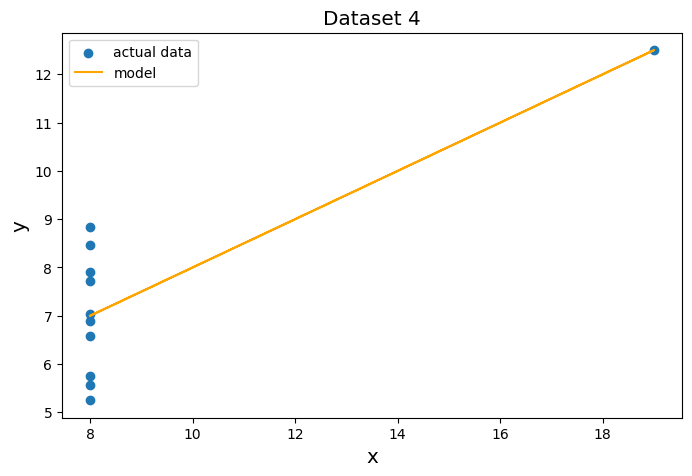

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(X4_test, y4_test, label = "actual data")
plt.plot(X4_test, predictions4, color = "orange", label = "model")

plt.title("Dataset 4", fontsize = "x-large")
plt.xlabel("x", fontsize = "x-large")
plt.ylabel("y", fontsize = "x-large")
plt.legend()

plt.show()

---
#End of Notebook

© 2023 The Coding School, All rights reserved